In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df=pd.read_csv("train.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [12]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [14]:
df.drop(['id', 'title', 'author'], axis=1, inplace=True)
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [15]:
missing_values = df.isna().sum()  # Counts the number of missing values in each column

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
text     39
label     0
dtype: int64


In [16]:
df = df.dropna(subset=['text'])
print(df)

                                                    text  label
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1
1      Ever get the feeling your life circles the rou...      0
2      Why the Truth Might Get You Fired October 29, ...      1
3      Videos 15 Civilians Killed In Single US Airstr...      1
4      Print \nAn Iranian woman has been sentenced to...      1
...                                                  ...    ...
20795  Rapper T. I. unloaded on black celebrities who...      0
20796  When the Green Bay Packers lost to the Washing...      0
20797  The Macy’s of today grew from the union of sev...      0
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1
20799    David Swanson is an author, activist, journa...      1

[20761 rows x 2 columns]


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Initialize NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jella\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def preprocess_text(text):
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocess_text function to each element in the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

print(df)

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                          processed_text  
0      house dem aide: didn’t even see comey’s letter...  
1      ever get feeling life circles roundabout rathe...  
2      truth might

C:\Users\jella\AppData\Local\Temp\ipykernel_19404\794037100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(preprocess_text)


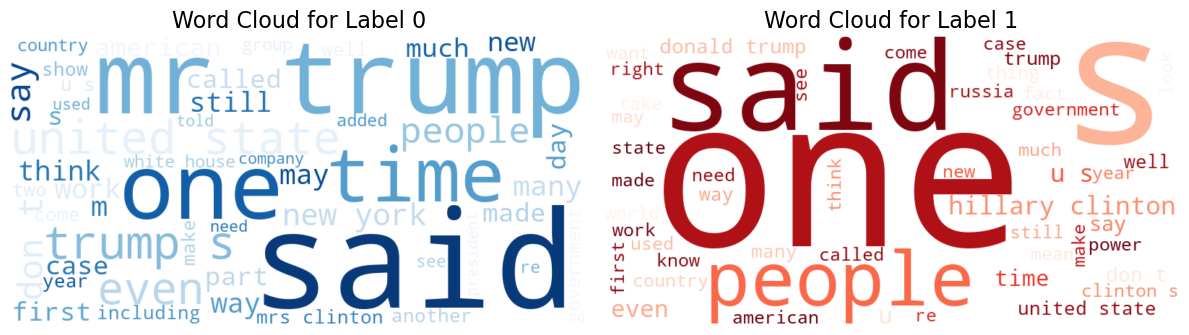

In [20]:
from wordcloud import WordCloud

# Generate word cloud for label 0 with customizations
text_label_0 = ' '.join(df[df['label'] == 0]['processed_text'])
wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=50).generate(text_label_0)

# Generate word cloud for label 1 with customizations
text_label_1 = ' '.join(df[df['label'] == 1]['processed_text'])
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=50).generate(text_label_1)

# Plot word clouds with additional customizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Word Cloud for Label 0', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Word Cloud for Label 1', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

237989

In [27]:
# padding data
sequences = tokenizer.texts_to_sequences(df['processed_text'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [29]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [30]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [31]:
embedding_matrix[1]

array([ 0.13342001,  0.19998001, -0.25533   , -0.051146  ,  0.11102   ,
        0.31290999,  0.20461001, -0.16978   ,  0.23591   , -0.19870999,
        0.27361   , -0.44758999,  0.15266   ,  0.36144999,  0.042599  ,
       -0.375     ,  0.35876   ,  0.38881999, -0.71937001,  0.45868   ,
       -0.026418  , -0.28536001, -0.30691999, -0.27586001,  0.19926   ,
        0.36140999,  0.11371   , -0.34173   ,  0.44716999,  0.027599  ,
       -0.12358   ,  0.43586001, -0.043002  ,  0.019661  ,  0.0075122 ,
       -0.092998  , -0.14560001,  0.21397001,  0.043995  , -0.78390002,
       -0.082397  , -0.27105001, -0.29763001,  0.18043999, -0.18894   ,
       -0.75373   , -0.23617999,  0.019604  , -0.38022   , -0.10602   ,
       -0.031779  ,  0.37211999,  0.20428   ,  1.02499998, -0.24906   ,
       -2.09050012,  0.12701   ,  0.043019  ,  0.99423999,  0.025519  ,
       -0.12768   ,  0.68374002, -0.45173001, -0.36655   ,  1.12810004,
       -0.16283999,  0.18392999, -0.32929999,  0.73676997, -0.30

In [32]:
padded_seq[1]

array([   262,     33,   1664,     98,   5159,  29150,    455,   2394,
         2128,    399,    585,   1648,   5602,     34,     13,    851,
          195,    400,   2017,  18233,    860,  21162,   3122,   2785,
          692,    794,    273,   2102,   3296,  11421,    141,     43,
         2276,  92444,   3242,   3786,   3707,   3296,    857,    174,
         3591,     34,  10163,  58244,   3368,     20,    231,     23,
         3344,  21162,  10417,    618,     12,    526,   2529,   2546,
         8371,    513,    743,   1534,    668,    157,     16,  23483,
          954,  25167,    353,     10,    178,   3831,     60,  11869,
          931,   2820,     19,    890,   5148,    190,     53,   5619,
         2276,   4654,     46,    274,    857,    223,     15,      4,
         2266,     15,      1,   2276,  10163,     67,   8824,  11583,
       125340,  21595,   3902, 125341,  92445, 125342,   5698,  33533,
        28290,   8340,  19701,  75595,   4605,      4,    176,    277,
      

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

# Stacked LSTM Model

In [67]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping


# Define a stacked LSTM model
def create_stacked_lstm():
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(0.2),
        LSTM(128, return_sequences=True),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model
model = create_stacked_lstm()

# Initialize layers
model.predict(x_train[:1])

# Model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Training
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256, callbacks=[early_stopping])

# Predictions and evaluation
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (1, 500, 100)               │      23,799,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (1, 500, 100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (1, 500, 128)               │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (1, 128)                    │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (1, 256)                    │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,081,113 (91.86 MB)

 Trainable params: 282,113 (1.08 MB)

 Non-trainable params: 23,799,000 (90.79 MB)

Epoch 1/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 839s 13s/step - accuracy: 0.6112 - loss: 0.6498 - val_accuracy: 0.6853 - val_loss: 0.5836
Epoch 2/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 777s 12s/step - accuracy: 0.6633 - loss: 0.5730 - val_accuracy: 0.7657 - val_loss: 0.5300
Epoch 3/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 793s 12s/step - accuracy: 0.6873 - loss: 0.5998 - val_accuracy: 0.6448 - val_loss: 0.6217
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step
[[1318  760]
 [ 213 1862]]
0.7657115338309656
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      2078
           1       0.71      0.90      0.79      2075

    accuracy                           0.77      4153
   macro avg       0.79      0.77      0.76      4153
weighted avg       0.79      0.77      0.76      4153



# Bidirectional Model

In [68]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Define the model structure
def create_model():
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(0.2),
        LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model instance
model = create_model()

# Manual initialization with sample input
sample_input = np.array(x_train[:1])  # Taking the first sample for initialization
model.predict(sample_input)  # This initializes the model layers

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256, callbacks=[early_stopping])

# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (1, 500, 100)               │      23,799,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (1, 500, 100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (1, 500, 128)               │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (1, 256)                    │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (1, 256)                    │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,245,465 (92.49 MB)

 Trainable params: 446,465 (1.70 MB)

 Non-trainable params: 23,799,000 (90.79 MB)

Epoch 1/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 1002s 15s/step - accuracy: 0.7167 - loss: 0.5446 - val_accuracy: 0.8584 - val_loss: 0.3323
Epoch 2/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 1054s 16s/step - accuracy: 0.8373 - loss: 0.3589 - val_accuracy: 0.8837 - val_loss: 0.2786
Epoch 3/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 1072s 16s/step - accuracy: 0.8661 - loss: 0.3081 - val_accuracy: 0.8866 - val_loss: 0.2575
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step
[[1953  125]
 [ 346 1729]]
0.8865880086684325
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2078
           1       0.93      0.83      0.88      2075

    accuracy                           0.89      4153
   macro avg       0.89      0.89      0.89      4153
weighted avg       0.89      0.89      0.89      4153



# LSTM with Regularization:

In [69]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define an LSTM model with regularization
def create_lstm_regularized():
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(0.2),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create, initialize, summarize, and train as before
model = create_lstm_regularized()
model.predict(x_train[:1])
model.summary()


# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256, callbacks=[early_stopping])
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (1, 500, 100)               │      23,799,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (1, 500, 100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (1, 128)                    │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (1, 256)                    │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,949,529 (91.36 MB)

 Trainable params: 150,529 (588.00 KB)

 Non-trainable params: 23,799,000 (90.79 MB)

Epoch 1/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.6136 - loss: 1.8696 - val_accuracy: 0.6244 - val_loss: 0.9326
Epoch 2/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6253 - loss: 0.8362 - val_accuracy: 0.6530 - val_loss: 0.6505
Epoch 3/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 3950s 62s/step - accuracy: 0.6455 - loss: 0.6516 - val_accuracy: 0.6901 - val_loss: 0.6184
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step
[[1469  609]
 [ 678 1397]]
0.6901035396099205
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2078
           1       0.70      0.67      0.68      2075

    accuracy                           0.69      4153
   macro avg       0.69      0.69      0.69      4153
weighted avg       0.69      0.69      0.69      4153



# Stacked LSTM with Regularization:

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a stacked LSTM model with regularization
def create_stacked_lstm_regularized():
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(0.2),
        LSTM(128, return_sequences=True),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create, initialize, summarize, and train as before
model = create_stacked_lstm_regularized()
model.predict(x_train[:1])
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256, callbacks=[early_stopping])
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (1, 500, 100)               │      23,799,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (1, 500, 100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (1, 500, 128)               │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (1, 128)                    │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (1, 256)                    │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,081,113 (91.86 MB)

 Trainable params: 282,113 (1.08 MB)

 Non-trainable params: 23,799,000 (90.79 MB)

Epoch 1/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 857s 13s/step - accuracy: 0.6161 - loss: 1.8562 - val_accuracy: 0.6742 - val_loss: 0.8942
Epoch 2/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 841s 13s/step - accuracy: 0.6832 - loss: 0.7849 - val_accuracy: 0.7082 - val_loss: 0.5844
Epoch 3/3
65/65 ━━━━━━━━━━━━━━━━━━━━ 844s 13s/step - accuracy: 0.6258 - loss: 0.6603 - val_accuracy: 0.6362 - val_loss: 0.6757
130/130 ━━━━━━━━━━━━━━━━━━━━ 46s 346ms/step
[[1026 1052]
 [ 160 1915]]
0.7081627738983867
              precision    recall  f1-score   support

           0       0.87      0.49      0.63      2078
           1       0.65      0.92      0.76      2075

    accuracy                           0.71      4153
   macro avg       0.76      0.71      0.69      4153
weighted avg       0.76      0.71      0.69      4153



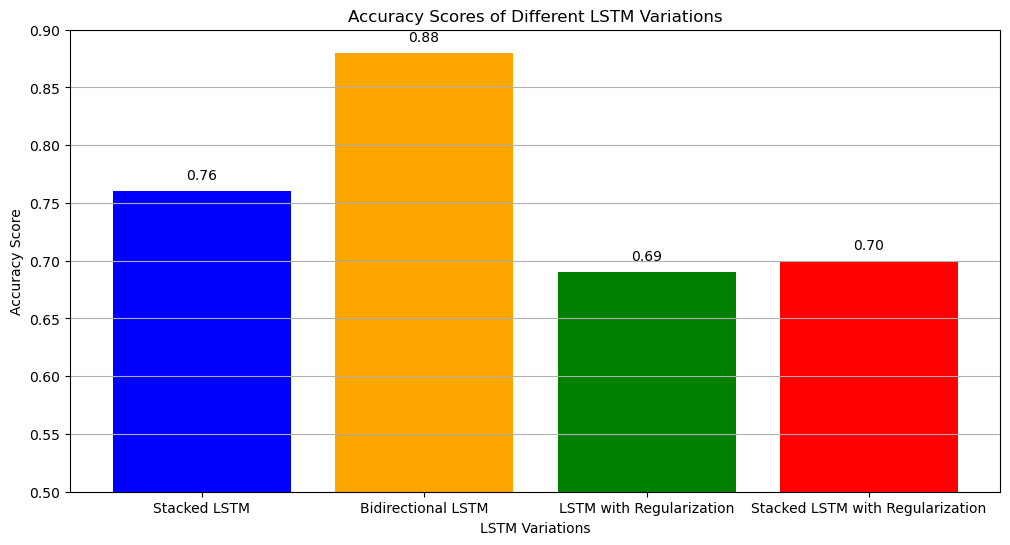

In [116]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Stacked LSTM': 0.76,
    'Bidirectional LSTM': 0.88,
    'LSTM with Regularization': 0.69,
    'Stacked LSTM with Regularization': 0.70
}

# Plotting the accuracy scores
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('LSTM Variations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different LSTM Variations')
plt.ylim(0.5, 0.9)  # Set the y-axis limit for better visualization
plt.grid(axis='y')

# Adding text labels
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()


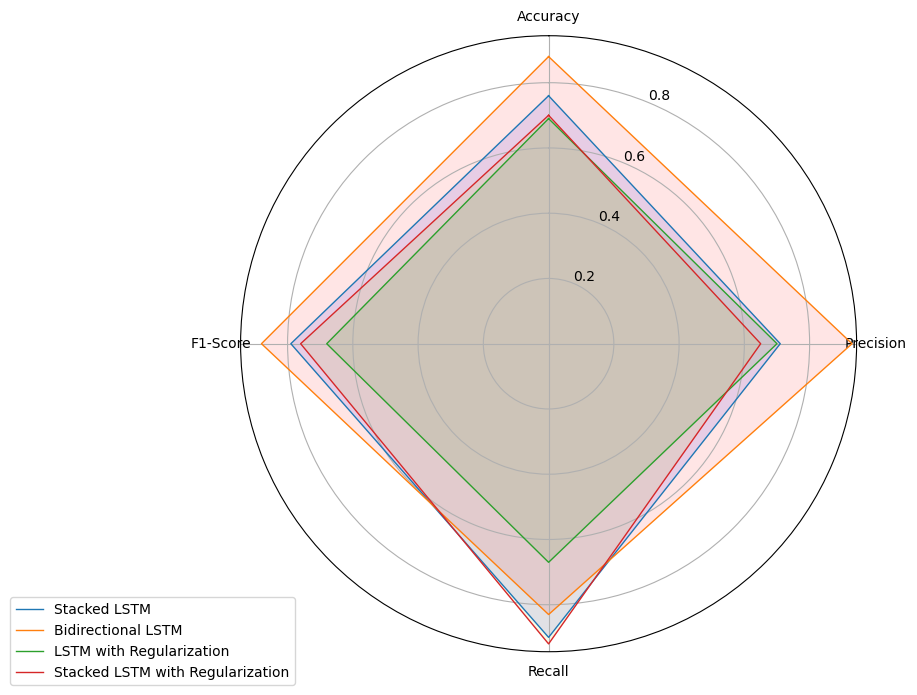

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Performance metrics for each LSTM variation
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
stacked_lstm_metrics = [0.76, 0.71, 0.90, 0.79]
bidirectional_lstm_metrics = [0.88, 0.93, 0.83, 0.88]
lstm_regularization_metrics = [0.69, 0.70, 0.67, 0.68]
stacked_lstm_regularization_metrics = [0.70, 0.65, 0.92, 0.76] 

# Number of metrics
num_metrics = len(labels)

# Create radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Make the plot close to a circle
stacked_lstm_metrics += stacked_lstm_metrics[:1]
bidirectional_lstm_metrics += bidirectional_lstm_metrics[:1]
lstm_regularization_metrics += lstm_regularization_metrics[:1]
stacked_lstm_regularization_metrics += stacked_lstm_regularization_metrics[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], labels)

# Plot data
ax.plot(angles, stacked_lstm_metrics, linewidth=1, linestyle='solid', label='Stacked LSTM')
ax.plot(angles, bidirectional_lstm_metrics, linewidth=1, linestyle='solid', label='Bidirectional LSTM')
ax.plot(angles, lstm_regularization_metrics, linewidth=1, linestyle='solid', label='LSTM with Regularization')
ax.plot(angles, stacked_lstm_regularization_metrics, linewidth=1, linestyle='solid', label='Stacked LSTM with Regularization')

# Fill area
ax.fill(angles, stacked_lstm_metrics, 'b', alpha=0.1)
ax.fill(angles, bidirectional_lstm_metrics, 'r', alpha=0.1)
ax.fill(angles, lstm_regularization_metrics, 'g', alpha=0.1)
ax.fill(angles, stacked_lstm_regularization_metrics, 'y', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


# Hyperparameter tuning

In [90]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install --upgrade keras tensorflow


Note: you may need to restart the kernel to use updated packages.


In [122]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid

# Define the model structure
def create_model(optimizer='adam', dropout_rate=0.2, recurrent_dropout=0.2):
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(dropout_rate),
        LSTM(128, return_sequences=True, dropout=dropout_rate, recurrent_dropout=recurrent_dropout),
        Bidirectional(LSTM(128, dropout=dropout_rate, recurrent_dropout=recurrent_dropout)),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the hyperparameters grid for grid search or randomized search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3],
    'recurrent_dropout': [0.2, 0.3]
}

# Create a list of all parameter combinations
param_combinations = list(ParameterGrid(param_grid))

# Perform hyperparameter tuning
best_score = 0.0
best_params = None

for params in param_combinations:
    model = create_model(**params)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=256, callbacks=[EarlyStopping(patience=2)])
    accuracy = model.evaluate(x_test, y_test)[1]
    
    if accuracy > best_score:
        best_score = accuracy
        best_params = params

print("Best accuracy:", best_score)
print("Best parameters:", best_params)


Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 0.6942 - val_accuracy: 0.5500 - val_loss: 0.6865
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step - accuracy: 0.5300 - loss: 0.6919 - val_accuracy: 0.5500 - val_loss: 0.6869
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - accuracy: 0.5700 - loss: 0.6872 - val_accuracy: 0.5500 - val_loss: 0.6840
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5500 - loss: 0.6840
Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6825
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 0.5300 - loss: 0.6913 - val_accuracy: 0.5500 - val_loss: 0.6840
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step - accuracy: 0.5000 - loss: 0.7002 - val_accuracy: 0.5500 - val_loss: 0.6863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5500 - loss: 0.6863
Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4600 - loss: 0.7018 - val_accuracy: 0.5500 -

# Attention Layer

In [112]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Flatten, Lambda, Multiply, Embedding, Dropout, Bidirectional, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

class Attention3D(Layer):
    """
    Implements a 3D attention mechanism for RNN/LSTM outputs.
    """

    def _init_(self, **kwargs):
        super(Attention3D, self)._init_(**kwargs)

    def build(self, input_shape):
        self.time_steps = input_shape[1]
        self.feature_dim = input_shape[2]

        # Attention model
        self.attention_fc = Dense(1, activation='tanh')
        self.attention_softmax = Dense(self.time_steps, activation='softmax', input_shape=(self.time_steps,))
        super().build(input_shape)

    def call(self, inputs):
        # Compute attention scores
        attention_probs = self.attention_fc(inputs)
        attention_probs = Flatten()(attention_probs)
        attention_probs = self.attention_softmax(attention_probs)

        # Expand dimensions to apply for multiplication
        attention_probs = Lambda(lambda x: tf.expand_dims(x, axis=-1))(attention_probs)

        # Multiply attention probs by inputs
        output = Multiply()([inputs, attention_probs])
        return output

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        config = super().get_config()
        return config

def create_bi_lstm_attention(vocab_size, embedding_matrix):
    model = Sequential([
        Embedding(vocab_size + 1, 100, weights=[embedding_matrix], trainable=False),
        Dropout(0.2),
        LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        Attention3D(),
        Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_bi_lstm_attention(vocab_size, embedding_matrix)

# Initialize layers by passing through a sample input
model.predict(np.array(x_train[:1]))

# Print model summary
model.summary()

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64, callbacks=[early_stopping])

# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_52 (Embedding)             │ (1, 50, 100)                │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (1, 50, 100)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_78 (LSTM)                       │ (1, 50, 128)                │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention3d_13 (Attention3D)         │ (1, 50, 128)                │           2,679 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_24 (Bidirectional)     │ (1, 256)                    │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (1, 256)                    │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,244 (1.72 MB)

 Trainable params: 449,144 (1.71 MB)

 Non-trainable params: 1,100 (4.30 KB)

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5100 - loss: 0.6929WARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000001360D9F5E40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5133 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6912
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.5319 - loss: 0.6918 - val_

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
